In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Import file 
df = pd.read_csv('Adidas US Sales.csv')

In [5]:
# Delete the first 3 rows
df = df.iloc[3:]

In [6]:
# Make the firts row header 
new_header = df.iloc[0]
df.columns = new_header

#Remove the first row
df = df[1:]

df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
5,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
6,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
7,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
8,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9648,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9649,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9650,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [7]:
# Convert Retail ID to numeric 
df['Retailer ID'] = pd.to_numeric(df['Retailer ID'])

# Convert Units Sold to numeric
df['Units Sold'] = df['Units Sold'].str.replace(',', '')
df['Units Sold'] = pd.to_numeric(df['Units Sold'])

# Convert Operating Profit to numeric
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '')
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'])

# Convert Total Sale to numeric 
df['Total Sales'] = df['Total Sales'].str.replace(',', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '')
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

# Convert Operating Margin to numeric 
df['Operating Margin'] = df['Operating Margin'].str.replace('%', '')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'])

# Convert Price per Unit to numeric 
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'])

# Convert Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])



In [8]:
# Export DF to CSV
df.to_csv('Adidas_Copy.csv')
df.to_csv('Adidas.csv')


In [9]:
Adidas = pd.read_csv('Adidas.csv')
Adidas.drop(columns=['Unnamed: 0'], inplace=True)
Adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30,In-store


### Analyze Data 

#### Find the best sale channel 

Text(0.5, 0, 'Channels')

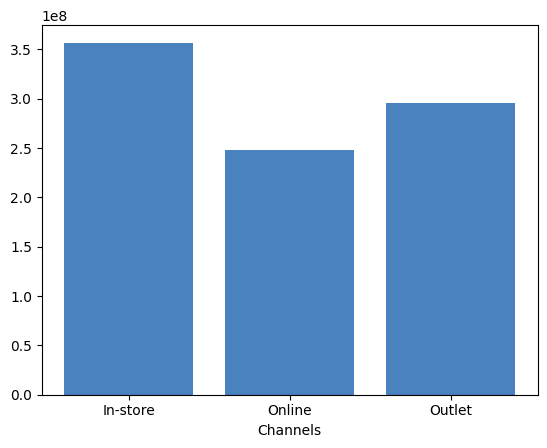

In [10]:
import matplotlib.pyplot as plt

results = Adidas.groupby('Sales Method').sum()
channels = [channel for channel, df in Adidas.groupby('Sales Method')]
plt.bar(channels, results['Total Sales'], color= '#4a81bf')
plt.xlabel('Channels')

### Sale by regions

<BarContainer object of 5 artists>

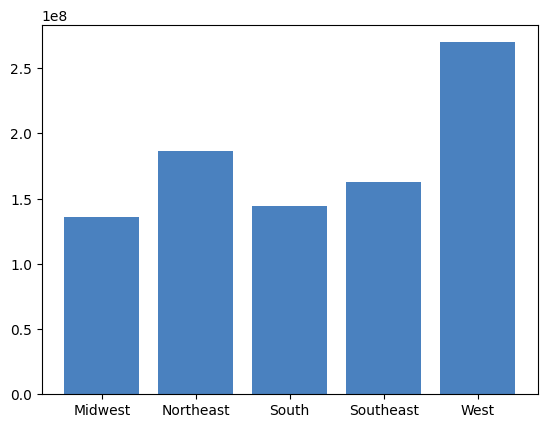

In [11]:
results_2 = Adidas.groupby('Region').sum()

Regions = [Region for Region, df in Adidas.groupby('Region')]

plt.bar(Regions, results_2['Total Sales'], color= '#4a81bf')


### Sale by channels

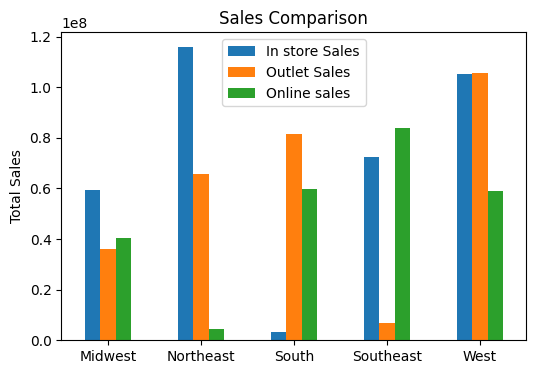

,In store Sales,Outlet Sales,Online sales
Midwest,59554000,35993000,40253459
Northeast,115950750,65746540,4626777
South,3393750,81430596,59838835
Southeast,72361250,6909776,83900210
West,105384000,105505581,59053601


In [12]:
# Calculate profits of each channel by region 
in_store_sales = Adidas.groupby('Region').apply(lambda x: x[x['Sales Method'] == 'In-store'].sum())
outlet_sales = Adidas.groupby('Region').apply(lambda x: x[x['Sales Method'] == 'Outlet'].sum())
online_channels_sales = Adidas.groupby('Region').apply(lambda x: x[x['Sales Method'] == 'Online'].sum())

# Create a table containing Regions
Regions = [Region for Region, df in Adidas.groupby('Region')]

# Create a dataframe containing all value 
df = pd.DataFrame({'In store Sales': in_store_sales['Total Sales'], 'Outlet Sales': outlet_sales['Total Sales'], 'Online sales': online_channels_sales['Total Sales']}, index=Regions)

# Print the bar
ax = df.plot(kind='bar', rot=0, figsize=(6, 4), title='Sales Comparison', ylabel='Total Sales')
plt.show()

df


### Calculating the type of products that have the highest operating margin

In [13]:
results = Adidas.groupby('Product')['Operating Margin'].mean()
results.sort_values(ascending = False)

Product
Men's Street Footwear        44.613043
Women's Apparel              44.131841
Women's Athletic Footwear    42.435866
Men's Apparel                41.322540
Women's Street Footwear      41.019900
Men's Athletic Footwear      40.270186
Name: Operating Margin, dtype: float64

### Calculating the type of Channel that have optimal operating margin

In [14]:
results = Adidas.groupby('Sales Method')['Operating Margin'].mean()
results.sort_values(ascending = False)

Sales Method
Online      46.415218
Outlet      39.487579
In-store    35.612069
Name: Operating Margin, dtype: float64

### Calculating the optimal operating margin of each type of products based on distribution channel

Text(0.5, 1.0, 'Operating Margin by Distribution Channel')

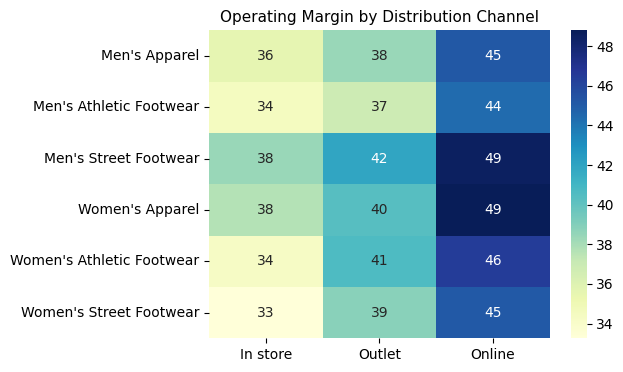

In [16]:
# Group products into one table 

Products = [Product for Product, df in Adidas.groupby('Product')]

# Calculate operating margin of each channel by products
in_store_OM = Adidas.groupby('Product').apply(lambda x: x[x['Sales Method'] == 'In-store'].mean(numeric_only=True))
outlet_OM = Adidas.groupby('Product').apply(lambda x: x[x['Sales Method'] == 'Outlet'].mean(numeric_only=True))
online_OM = Adidas.groupby('Product').apply(lambda x: x[x['Sales Method'] == 'Online'].mean(numeric_only=True))

# Heatmap of Operating Margin of Products by Channels
df = pd.DataFrame({'In store': in_store_OM['Operating Margin'], 'Outlet': outlet_OM['Operating Margin'], 'Online': online_OM['Operating Margin']}, index=Products)

plt.figure(figsize = (5.5,4))
ax = plt.axes()
sns.heatmap(df, cmap="YlGnBu", annot = True, ax=ax)
ax.set_title('Operating Margin by Distribution Channel', fontsize = 11)


### Analyze Unit Sold by Regions


In [17]:
# Create a table containing Regions
Regions = [Region for Region, df in Adidas.groupby('Region')]

# Create a table containing Products
Products = [Product for Product, df in Adidas.groupby('Product')]

# Assign value to the table
results = pd.DataFrame()
for product in Products:
    for region in Regions:
        filtered_df = Adidas[(Adidas['Product'] == product) & (Adidas['Region'] == region)]
        results.loc[product, region] = filtered_df['Units Sold'].sum()

results


,Midwest,Northeast,South,Southeast,West
Men's Apparel,45304.0,62031.0,60641.0,54385.0,84322.0
Men's Athletic Footwear,65120.0,81474.0,90079.0,71129.0,127724.0
Men's Street Footwear,109861.0,134252.0,106545.0,91867.0,150795.0
Women's Apparel,69435.0,90048.0,88740.0,68839.0,116765.0
Women's Athletic Footwear,44808.0,59464.0,63998.0,55292.0,93674.0
Women's Street Footwear,56809.0,74010.0,82257.0,65488.0,113705.0


<Axes: >

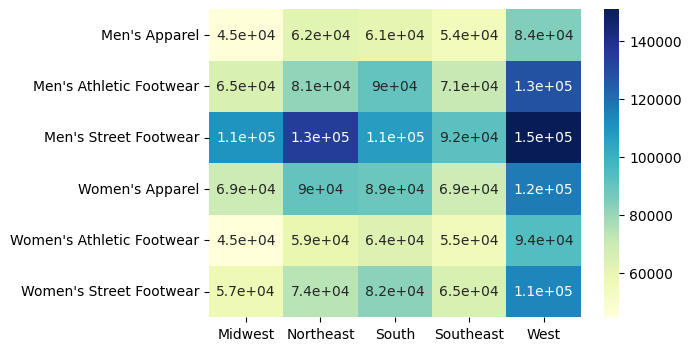

In [20]:
plt.figure(figsize = (6,4))
sns.heatmap(results, cmap="YlGnBu", annot = True)

- There are weak indice of Men's Street Footwear in South (< ~15%) comparing to that of Northeast => apply more promotion on this area
- There is very strong Men's Street Footwear buying power in Midwest => there is huge potential customers on this area that need to be exloited 

In [18]:
top_grossing = Adidas.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
top_grossing


,City,Operating Profit
1,Charleston,15607205
2,New York,13899981
3,Miami,12168628
4,Portland,10760813
5,San Francisco,10256252
6,Houston,9845140
7,Charlotte,9756425
8,Albany,9429864
9,New Orleans,9417239
10,Birmingham,9147581


### Evaluate performance of retailers by channel 

<Axes: >

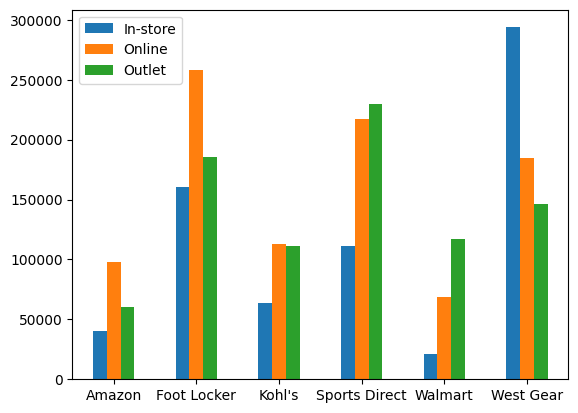

In [19]:
Retailers = [retailer for retailer, df in Adidas.groupby('Retailer')]
Channels = [channel for channel, df in Adidas.groupby('Sales Method')]

results = pd.DataFrame()
# Calculate Unit Sold by Channel by Retailer
for Channel in Channels:
    for Retailer in Retailers:
        filtered_df = Adidas[(Adidas['Sales Method'] == Channel) & (Adidas['Retailer'] == Retailer)]
        results.loc[Retailer, Channel] = filtered_df['Units Sold'].sum()

results.plot(kind = 'bar', rot = 0)
       

### Evaluate sale in Midwest area

<Axes: >

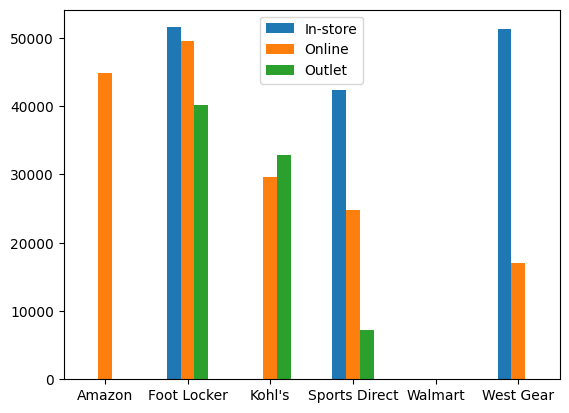

In [21]:
for Channel in Channels:
    for Retailer in Retailers:
        filtered_df = Adidas[(Adidas['Sales Method'] == Channel) & (Adidas['Retailer'] == Retailer) & (Adidas['Region'] == 'Midwest')]
        results.loc[Retailer, Channel] = filtered_df['Units Sold'].sum()

results.plot(kind = 'bar', rot = 0)

### Evaluate sale of each Retailer in Midwest by products

<Axes: >

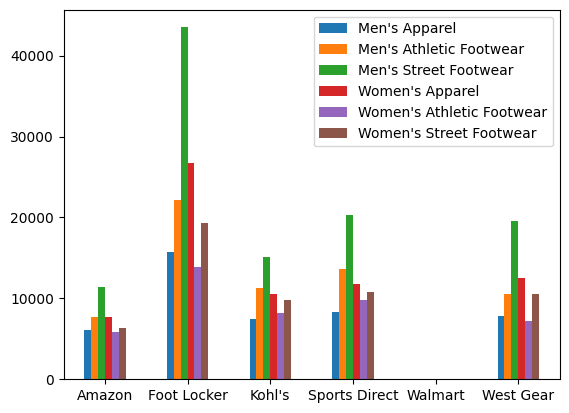

In [23]:
results = pd.DataFrame()
for product in Products:
    for Retailer in Retailers:
        filtered_df = Adidas[(Adidas['Product'] == product) & (Adidas['Retailer'] == Retailer) & (Adidas['Region'] == 'Midwest')]
        results.loc[Retailer, product] = filtered_df['Units Sold'].sum()

results.plot(kind = 'bar', rot = 0)


#### Comment: Footlocker can apply more promotion to promote other products


<Axes: xlabel='Retailer', ylabel='Units Sold'>

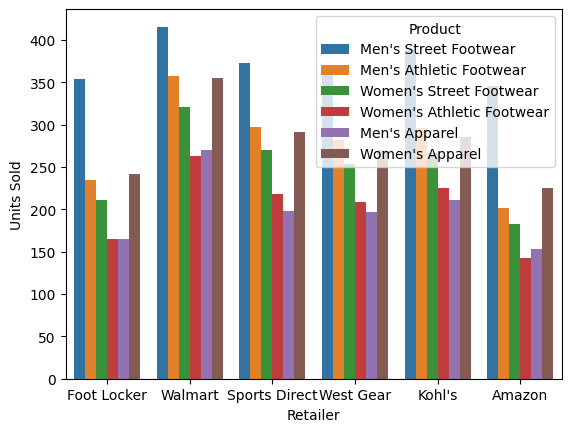

In [24]:
sns.barplot(Adidas, x="Retailer" , y="Units Sold", hue = "Product", errorbar=None)



In [25]:
Adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200,896,28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305,1378,32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544,2791,37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940,1235,42,Outlet


In [26]:
df

,In store,Outlet,Online
Men's Apparel,35.601375,38.404382,45.172202
Men's Athletic Footwear,34.498270,36.865347,44.421569
Men's Street Footwear,38.362069,41.888889,48.517157
Women's Apparel,37.672414,40.300199,48.795092
Women's Athletic Footwear,34.275862,40.651394,46.443489
Women's Street Footwear,33.258621,38.821074,45.138650


In [35]:
print(Adidas_Anal)


         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear     

In [27]:
#convert Invoice Date to Datetime and add new columns

Adidas['Invoice Date'] = Adidas['Invoice Date'].astype('datetime64[ns]')
Adidas['Month_Year'] = Adidas['Invoice Date'].dt.to_period('M')
Adidas['Month'] = Adidas['Invoice Date'].dt.month
Adidas['Year'] = Adidas['Invoice Date'].dt.year

Adidas['Year'] = Adidas['Year'].astype(str)

Adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month_Year,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50,In-store,2020-01,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30,In-store,2020-01,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35,In-store,2020-01,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35,In-store,2020-01,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30,In-store,2020-01,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200,896,28,Outlet,2021-01,1,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305,1378,32,Outlet,2021-01,1,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544,2791,37,Outlet,2021-02,2,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940,1235,42,Outlet,2021-02,2,2021


<Axes: xlabel='Month', ylabel='Units Sold'>

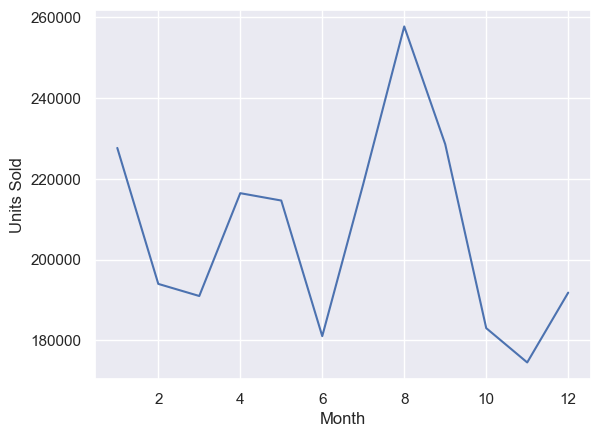

In [30]:
# Create new table to track sale by month in both 2021 and 2022 


TrackUnitSoldByMonth = Adidas_Anal.groupby('Month')['Units Sold'].sum()

# LineChart 
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.lineplot(data= TrackUnitSoldByMonth)


### Peakmonth of sale are: 1, 4, 8 (Total country)

<Axes: >

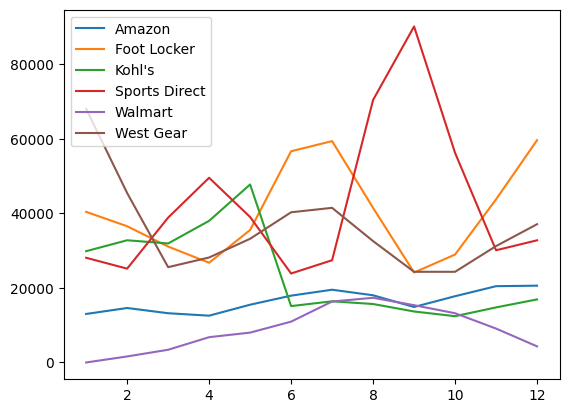

In [29]:
# Palette
palette = sns.color_palette("mako_r", 6)

# Caclulate total order of each retailer thoroughly year
results = pd.DataFrame()
filtered_df = pd.DataFrame()


Month =  [month for month, df in Adidas.groupby('Month')]
Retailers = [retailer for retailer, df in Adidas.groupby('Retailer')]


for retailer in Retailers:
    for month in Month:
        filtered_df = Adidas[(Adidas['Month'] == month) & (Adidas['Retailer'] == retailer) & (Adidas['Year'] == '2021')]
        results.loc[month, retailer] = filtered_df['Units Sold'].sum()


results.plot.line()

<Axes: >

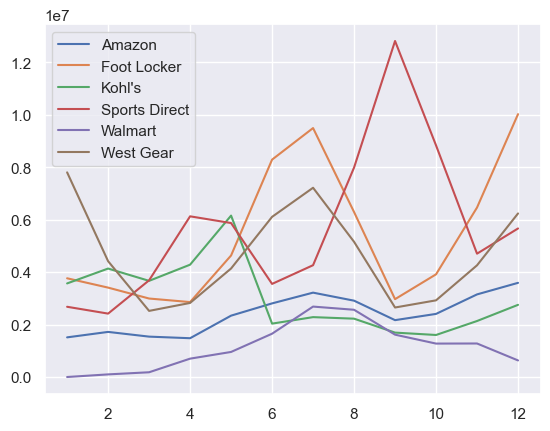

In [32]:
# Calculate profit thorough the year of 2021 of retailer

# Palette
palette = sns.color_palette("mako_r", 6)

# Caclulate total order of each retailer thoroughly year
results = pd.DataFrame()
filtered_df = pd.DataFrame()


Month =  [month for month, df in Adidas_Anal.groupby('Month')]
Retailers = [retailer for retailer, df in Adidas_Anal.groupby('Retailer')]


for retailer in Retailers:
    for month in Month:
        filtered_df = Adidas_Anal[(Adidas_Anal['Month'] == month) & (Adidas_Anal['Retailer'] == retailer) & (Adidas_Anal['Year'] == '2021')]
        results.loc[month, retailer] = filtered_df['Operating Profit'].sum()


results.plot.line()

<Axes: >

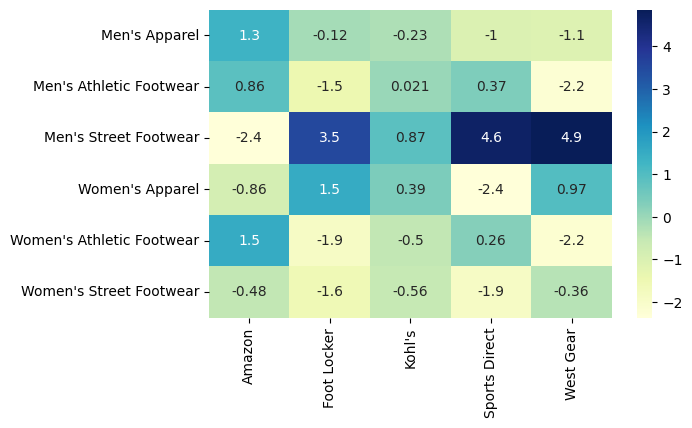

In [30]:
# Calculate % sale order of each type of products by retailers
results = pd.DataFrame()

def percentageSaleOfProduct(product, retailer):
    itr = Adidas[(Adidas['Year'] == '2021') & (Adidas['Retailer'] == retailer)]
    totalSale = itr['Units Sold'].sum()

    if totalSale == 0:
        return float('nan')  

    itr_product = Adidas[(Adidas['Product'] == product) & (Adidas['Year'] == '2021') & (Adidas['Retailer'] == retailer)]
    totalSaleOfProduct = itr_product['Units Sold'].sum()

    return totalSaleOfProduct / totalSale

def percentageSaleOfRegionalProduct(product, retailer, region):
    itr = Adidas[(Adidas['Year'] == '2021') & (Adidas['Retailer'] == retailer) & (Adidas['Region'] == region)]
    totalSale = itr['Units Sold'].sum()

    if totalSale == 0:
        return float('nan')  

    itr_product_region = Adidas[(Adidas['Product'] == product) & (Adidas['Year'] == '2021') & (Adidas['Retailer'] == retailer) & (Adidas['Region'] == region)]
    totalSaleOfProductRegion = itr_product_region['Units Sold'].sum()

    return totalSaleOfProductRegion / totalSale

for retailer in Retailers:
    for product in Products:
        percentage_product = percentageSaleOfProduct(product, retailer)
        percentage_product_region = percentageSaleOfRegionalProduct(product, retailer, 'Midwest')

        diff = percentage_product_region - percentage_product
        results.loc[product, retailer] = 100*diff

# Drop emtpy Retailer
plt.figure(figsize = (6.5,4))
results.drop(columns=['Walmart'], inplace=True)
sns.heatmap(results, cmap="YlGnBu", annot = True)

In [31]:
print(results)

                             Amazon  Foot Locker    Kohl's  Sports Direct  \
Men's Apparel              1.322654    -0.121977 -0.227902      -1.021789   
Men's Athletic Footwear    0.856933    -1.458501  0.021483       0.368433   
Men's Street Footwear     -2.364494     3.511311  0.872264       4.638517   
Women's Apparel           -0.862549     1.522793  0.390077      -2.350651   
Women's Athletic Footwear  1.526199    -1.893523 -0.498801       0.261628   
Women's Street Footwear   -0.478742    -1.560102 -0.557121      -1.896138   

                           West Gear  
Men's Apparel              -1.078363  
Men's Athletic Footwear    -2.209072  
Men's Street Footwear       4.860165  
Women's Apparel             0.965721  
Women's Athletic Footwear  -2.182248  
Women's Street Footwear    -0.356204  


We can notice that there is imbalanced between retailers performance on men's Street Footwear. Kohl's and Amazon have many untapped potential male customers, so they should put more effort on that segment by apply more promotion, run ads on them. 